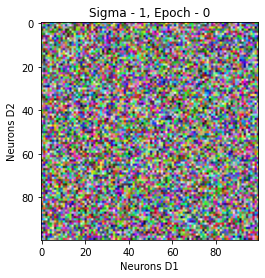

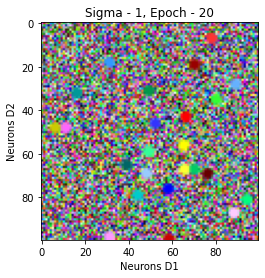

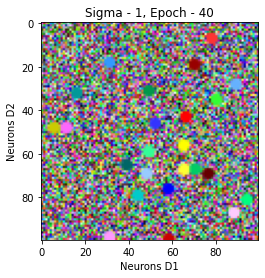

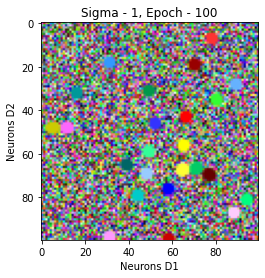

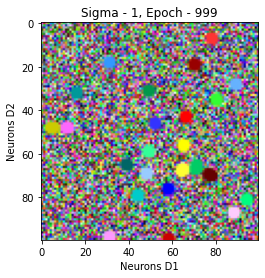

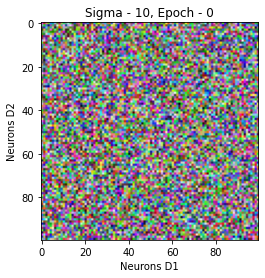

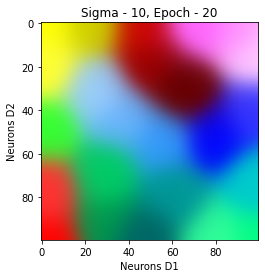

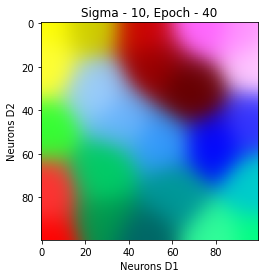

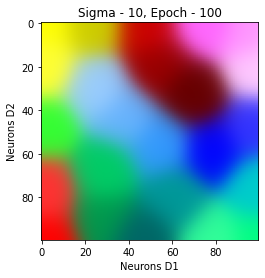

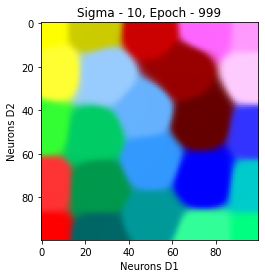

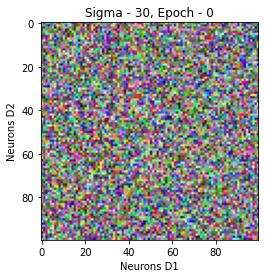

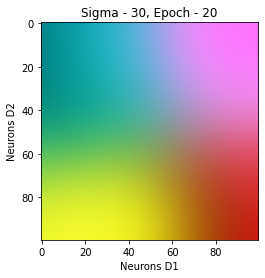

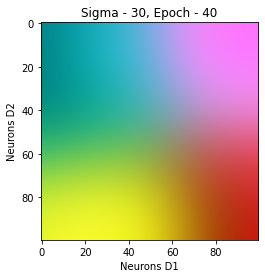

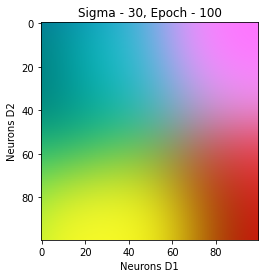

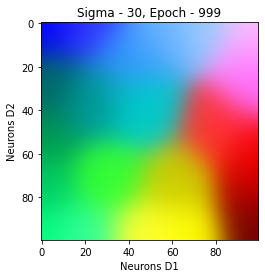

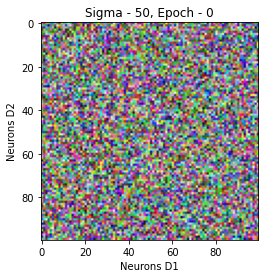

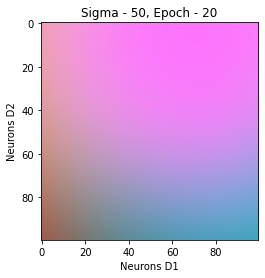

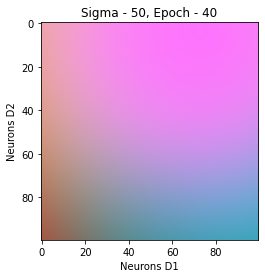

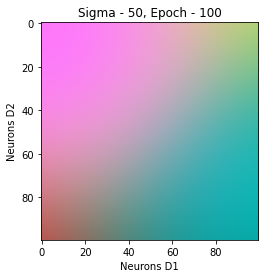

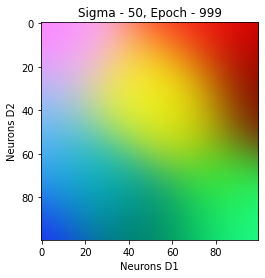

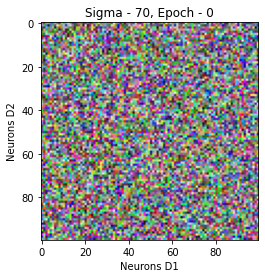

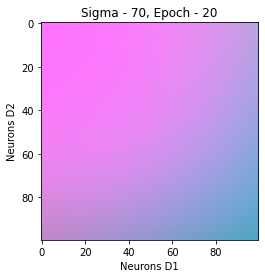

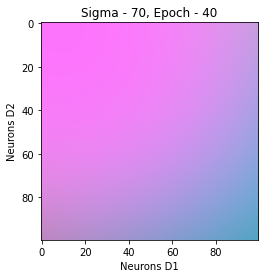

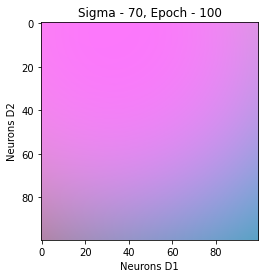

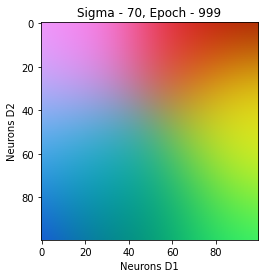

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import exp

class SOMNN:
    def __init__(self, layers, seed):
        self.colours = np.array([ #random bunch of colours in the range specified
            [0, 0, 255],
            [51, 51, 255],
            [51, 153, 255],
            [102, 178, 255],
            [153, 204, 255],
            [0, 153, 76],
            [0, 204, 102],
            [0, 255, 128],
            [51, 255, 153],
            [51, 255, 51],
            [153, 0, 0],
            [204, 0, 0],
            [255, 0, 0],
            [255, 51, 51],
            [102, 0, 0],
            [204, 204, 0],
            [255, 255, 0],
            [255, 255, 51],
            [0, 153, 153],
            [0, 102, 102],
            [0, 204, 204],
            [255, 204, 255],
            [255, 153, 255],
            [255, 102, 255]
        ])

        self.colours_norm = self.colours / 255
        self.layers = layers #2x1 array describing the dims of the upper layer (100 x 100 in this case)
        self.seed = seed

    def setup(self): #re-initialise weights (done for every new sigma)
        np.random.seed(self.seed)
        self.weights = np.random.uniform(0, 1, (3, self.layers[0], self.layers[1]))

    def train(self, epochs, sigma0): #method to train
        for epoch in range(epochs): #for one epoch
            distances = np.empty((3, self.layers[0], self.layers[1])) #empty array to hold vector of differences between input and all weights
            euc_distances = np.empty((self.layers[0], self.layers[1])) #empty array to hold euclidean distances between input and all weights -> for use in neighbourhood function
            if epoch in [0, 20, 40, 100]:
                self.plot(sigma0, epoch)
            for k in range(self.colours_norm.shape[0]): #for each input
                distances = self.distance(self.colours_norm[k].reshape((3, 1, 1)), self.weights)
                euc_distances = self.euc_distance(self.colours_norm[k].reshape((3, 1, 1)), self.weights)
                min_dist = euc_distances.min() #get min distance, ie winning node
                min_index = np.where(euc_distances == min_dist) #get 2D index of winning node
                min_i = min_index[0][0]
                min_j = min_index[1][0]
                min_array = np.array((min_i, min_j)).reshape(2, 1, 1) #reshape array for use in operations below
                coordinate_array = np.indices((100, 100)) #array to hold 2D coordinates of all nodes for use in neighbourhood calculation
                learning_rate = self.learning_rate(epoch, epochs) #scalar learning rate
                neighbourhood = self.neighbourhood(epoch, min_array, coordinate_array, sigma0, epochs) #get value of neighbourhood function
                d_neighbourhood = learning_rate * neighbourhood
                dw = d_neighbourhood * (distances)
                self.weights += dw
            if epoch == 999:
                self.plot(sigma0, epoch) #separated from the others to get the final state of graph

    def distance(self, input, weight):
        distance = (input - weight)
        return distance

    def euc_distance(self, input, weight):
        temp = input - weight
        distance = np.linalg.norm(temp, 2, axis=0)
        return distance #needs to be np array

    def learning_rate(self, epoch, total_epochs):
        return 0.8 * exp(-epoch / total_epochs) #scalar

    def neighbourhood(self, epoch, i, j, sigma0, total_epochs):
        neighbourhood = np.exp(-self.euc_distance(i, j) ** 2 / (2 * self.sigma(epoch, sigma0, total_epochs) ** 2))
        return neighbourhood #needs to be np array

    def sigma(self, epoch, sigma0, total_epochs):
        return sigma0 * exp(-epoch / total_epochs) #scalar

    def plot(self, sigma, epoch):
        plt.xlabel("Neurons D1")
        plt.ylabel("Neurons D2")
        plt.title("Sigma - {}, Epoch - {}".format(sigma, epoch))
        plt.imshow(self.weights.T)
        #plt.savefig("Sigma-{}, Epoch-{}.png".format(sigma, epoch)) #commented out. This was for my report
        plt.show()




somnn = SOMNN([100,100], 25)

for sigma0 in [1,10,30,50,70]: #change values in sigma here to see different values
    somnn.setup()
    somnn.train(1000, sigma0) #note that the graph will show at epochs 0, 20, 40, 100, 999
